In [3]:
import os
import sys
sys.path.insert(0, os.path.abspath('../lib/VAD-Humbug'))
sys.path.insert(0, os.path.abspath('../lib/VAD-Humbug'))
sys.path.insert(0, os.path.abspath('../lib'))
import os
# if not os.getcwd().endswith('VAD-Humbug'):
#   os.chdir('../lib/VAD-Humbug')
from VAD_pipeline import VAD_pipeline
import matplotlib.pyplot as plt

import pickle
import util
import librosa
import numpy as np
import soundfile as sf
import ipdb

from scipy.signal import medfilt

# VAD

# Load model for detection

## Deep learning (skip if keras/tensorflow not installed)

In [4]:
from tensorflow import keras
model = keras.models.load_model('../models/BNN/Win_40_Stride_5_CNN_log-mel_128_norm_Falseheld_out_test_manual_v2_low_epoch.h5',
                               custom_objects={"dropout": 0.2})
model_name = 'held_out_test_manual_v2_low_epoch'
win_size=40
step_size=40
feat_type='log-mel'
n_feat=128

C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ikiskin

In [5]:
def get_wav_for_path(noise_path_names, sr):
    x = []
    signal_length = 0
    for path in noise_path_names:
#         print(path)
        signal, _ = librosa.load(path, sr=sr)
        x.append(signal)
        signal_length += len(signal)/sr
    return x, signal_length

## Random Forest prediction

In [56]:
model_name = 'clf_CDC_mfcc-cut20'
with open('../models/' + model_name + '.pickle', 'rb') as handle:
    clf = pickle.load(handle)

2020-11-09_18.59.09.243.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/1800/2020-11-09_18.59.09.243.wav
[[424.576, 424.96, '0.60'], [425.216, 425.344, '0.57'], [940.416, 940.864, '0.99'], [1256.064, 1256.192, '0.51'], [1452.032, 1452.48, '0.96'], [1462.464, 1463.36, '0.84'], [1753.536, 1753.728, '0.59']]


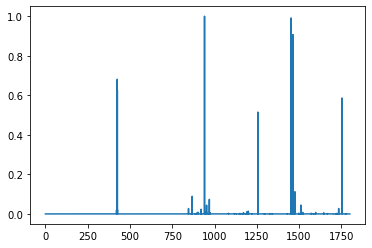

2020-11-09_19.29.14.337.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/1900/2020-11-09_19.29.14.337.wav
[]


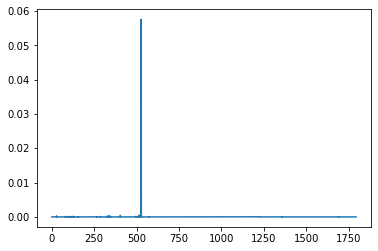

2020-11-09_19.59.14.331.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/1900/2020-11-09_19.59.14.331.wav
[]


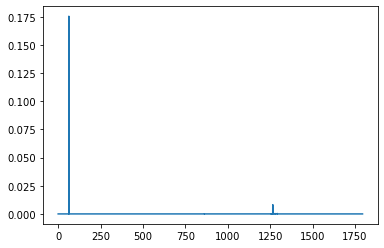

2020-11-09_20.29.14.359.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2000/2020-11-09_20.29.14.359.wav
[]


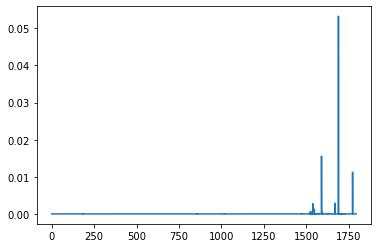

2020-11-09_20.59.14.355.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2000/2020-11-09_20.59.14.355.wav
[[1746.368, 1746.752, '0.84']]


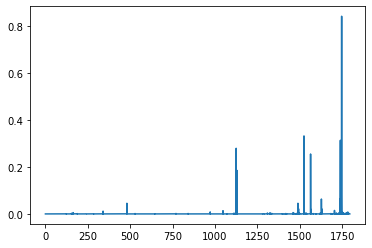

2020-11-09_21.29.14.391.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2100/2020-11-09_21.29.14.391.wav
[]


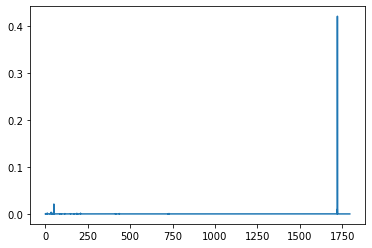

2020-11-09_21.59.14.342.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2100/2020-11-09_21.59.14.342.wav
[]


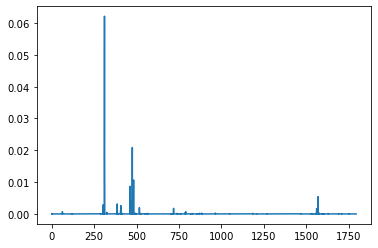

2020-11-09_22.29.14.343.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2200/2020-11-09_22.29.14.343.wav
[[326.528, 326.976, '0.97']]


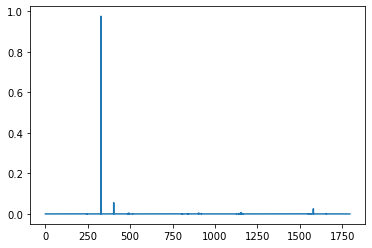

2020-11-09_22.59.14.358.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2200/2020-11-09_22.59.14.358.wav
[[40.448, 40.832, '0.94']]


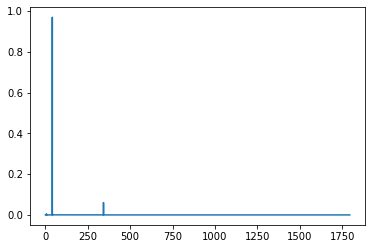

2020-11-09_23.29.14.358.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2300/2020-11-09_23.29.14.358.wav
[]


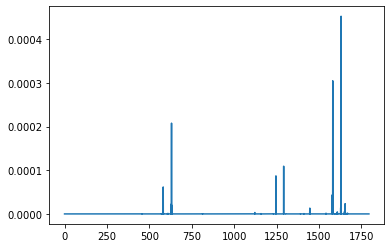

2020-11-09_23.59.14.396.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2300/2020-11-09_23.59.14.396.wav
[]


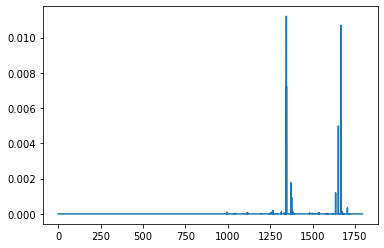

In [61]:
sr = 8000
to_filter = True
kernel_size = 11

directory = 'D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/'
subdirectories = ['1800', '0019', '2000', '2100', '2200', '2300']
dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/'


for subdir in subdirectories:
    listdirectory = os.listdir(directory + subdir) # gets the name of all files in your dir
    for filename in listdirectory: 
        if filename.endswith(".wav"): # check each of the files for whether or not they end in .wav:
            print(filename)
            x, x_l = get_wav_for_path([directory + subdir + '/' + filename], sr =8000)
            X = util.get_feat(x, sr=8000, feat_type='mfcc-cut', flatten = True, n_feat=20)
           
            preds_prob = clf.predict_proba(X)
            
            if to_filter:
                preds_filt = np.zeros([len(preds_prob),2])
                preds_filt[:,1] = medfilt(preds_prob[:,1], kernel_size=kernel_size)
                preds_filt[:,0] = 1 - preds_prob[:,1]
                preds_prob = preds_filt
          
            preds_list = util.detect_timestamps(preds_prob)
            
            plt.plot((1/sr)*librosa.frames_to_samples(np.arange(len(preds_prob)), hop_length=512),
                                               preds_prob[:,1])
            print(preds_list)
            plt.show()

            if not os.path.exists(dir_out + subdir): os.makedirs(dir_out + subdir)
#             with open(dir_out + subdir + '/mozz_pred_list' + filename + '.pkl', 'wb') as f:
#                 pickle.dump(preds_list, f)
            np.savetxt(dir_out + subdir + '/' + str(model_name) + filename + '.txt', preds_list, fmt='%s', delimiter='\t')
                               

# BNN prediction

In [180]:
rootFolderPath = 'D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/Semi-field raw data Nov 2020/Chamber C phone 3 (C3)'
audio_format = '.wav'
dir_out = None  # None if we want to save files in the same folder that we read from



#CNN:
to_filter = False
norm = False
step_size= 40
debug= True
n_samples = 10
n_hop = 512
sr = 8000
win_size = 40


#Experimental
mozz_audio_list = []
det_threshold = 0.5

i_signal = 0
for root, dirs, files in os.walk(rootFolderPath):
    for filename in files:
        if filename.endswith(audio_format):
#             print(root, filename) 
            i_signal+=1
            x, x_l = get_wav_for_path([os.path.join(root, filename)], sr =8000)
            if debug:
                print(filename + ' signal length', x_l)
            if x_l < (n_hop * win_size)/sr: 
                print('Signal length too short, skipping:', x_l, filename) 
            else:
    #             
                X_CNN = util.get_feat(x, sr=8000, feat_type=feat_type, n_feat=n_feat, flatten = False)

                X_CNN = util.reshape_feat(X_CNN, win_size=win_size, step_size=step_size)
    #             X_CNN = (X_CNN - mean)/std
    #             print(np.shape(X_CNN))

                out = []
                for i in range(n_samples):
                    out.append(model.predict(X_CNN))

                G_X, U_X, _ = util.active_BALD(np.log(out), X_CNN, 2)
                preds_list = util.detect_timestamps_BNN(np.repeat(np.mean(out, axis=0), step_size, axis=0),
                                      np.repeat(G_X, step_size, axis=0),
                                      np.repeat(U_X, step_size, axis=0), det_threshold=det_threshold)   

                if to_filter:
                    preds_filt = np.zeros([len(preds_CNN),2])
                    preds_filt[:,1] = medfilt(preds_CNN[:,1], kernel_size=51)
                    preds_filt[:,0] = 1 - preds_filt[:,1]
                    preds_CNN = preds_filt

                if debug:
                    print(preds_list)
                    for times in preds_list:
                        mozz_audio_list.append(librosa.load(os.path.join(root, filename), offset=float(times[0]),
                                                             duration=float(times[1])-float(times[0]), sr=sr)[0])
#                     plt.plot((1/sr)*librosa.frames_to_samples(np.arange(len(np.repeat(np.mean(out, axis=0),step_size, axis=0))), hop_length=512),
#                                                    np.repeat(np.mean(out, axis=0), step_size, axis=0)[:,1])
#                     plt.xlabel('Seconds')
#                     plt.ylabel('Mean probability (mozz)')
#                     plt.show()


                dir_out = root

                if not os.path.exists(dir_out): os.makedirs(dir_out)
                np.savetxt(dir_out + '/' + filename + '_BNN_step_' + str(step_size) + '_samples_' + str(n_samples) + '_'
                           + str(model_name) + '.txt', preds_list, fmt='%s', delimiter='\t')


print('Total files of ' + str(audio_format) + ' format found:', i_signal)


2020-11-09_18.58.35.940.wav signal length 1799.76
[]
2020-11-09_19.28.41.065.wav signal length 1794.72
[]
2020-11-09_19.58.41.029.wav signal length 1794.72
[]
2020-11-09_20.28.41.039.wav signal length 1794.6
[['204.8', '207.36', '0.65 PE: 0.93 MI: 0.13'], ['1295.36', '1297.92', '0.53 PE: 1.00 MI: 0.08'], ['1446.4', '1448.96', '0.68 PE: 0.91 MI: 0.16']]
2020-11-09_20.58.41.049.wav signal length 1794.72
[]
2020-11-09_21.28.41.081.wav signal length 1794.6
[['921.6', '924.16', '0.54 PE: 0.99 MI: 0.35']]
2020-11-09_21.58.41.039.wav signal length 1794.72
[]
2020-11-09_22.28.41.057.wav signal length 1794.72
[['1221.12', '1223.68', '0.61 PE: 0.97 MI: 0.32'], ['1443.84', '1446.4', '1.00 PE: 0.04 MI: 0.01']]
2020-11-09_22.58.41.067.wav signal length 1794.72
[['417.28', '419.84', '0.77 PE: 0.78 MI: 0.18']]
2020-11-09_23.28.41.058.wav signal length 1794.72
[['501.76', '504.32', '0.71 PE: 0.87 MI: 0.15'], ['696.32', '698.88', '0.53 PE: 1.00 MI: 0.13']]
2020-11-09_23.58.41.044.wav signal length 1794

[['1733.12', '1735.68', '0.52 PE: 1.00 MI: 0.51']]
2020-11-12_19.51.05.126.wav signal length 1794.72
[]
2020-11-12_20.21.05.124.wav signal length 1794.6
[]
2020-11-12_20.51.05.157.wav signal length 1794.72
[]
2020-11-12_21.21.05.137.wav signal length 1794.72
[['1633.28', '1635.84', '0.62 PE: 0.96 MI: 0.22'], ['1640.96', '1651.2', '0.63 PE: 0.92 MI: 0.18'], ['1653.76', '1661.44', '0.57 PE: 0.99 MI: 0.23'], ['1664.0', '1669.12', '0.69 PE: 0.87 MI: 0.26'], ['1681.92', '1684.48', '0.59 PE: 0.98 MI: 0.25']]
2020-11-12_21.51.05.140.wav signal length 1794.6
[['0.0', '5.12', '0.68 PE: 0.88 MI: 0.19'], ['46.08', '48.64', '0.64 PE: 0.94 MI: 0.27'], ['66.56', '74.24', '0.63 PE: 0.92 MI: 0.19'], ['138.24', '140.8', '0.50 PE: 1.00 MI: 0.45'], ['151.04', '153.6', '0.59 PE: 0.98 MI: 0.25'], ['158.72', '161.28', '0.52 PE: 1.00 MI: 0.27'], ['166.4', '168.96', '0.56 PE: 0.99 MI: 0.14'], ['176.64', '179.2', '0.74 PE: 0.83 MI: 0.36'], ['199.68', '209.92', '0.72 PE: 0.83 MI: 0.16'], ['296.96', '302.08', '0

2020-11-16_20.52.07.664.wav signal length 1794.72
[['238.08', '240.64', '0.52 PE: 1.00 MI: 0.28'], ['243.2', '245.76', '0.68 PE: 0.90 MI: 0.53'], ['302.08', '307.2', '0.74 PE: 0.78 MI: 0.43'], ['325.12', '327.68', '0.96 PE: 0.23 MI: 0.10'], ['1267.2', '1269.76', '0.71 PE: 0.86 MI: 0.34'], ['1372.16', '1374.72', '0.91 PE: 0.42 MI: 0.29'], ['1733.12', '1743.36', '0.84 PE: 0.49 MI: 0.16']]
2020-11-16_21.22.07.694.wav signal length 1794.72
[['0.0', '5.12', '0.63 PE: 0.95 MI: 0.33'], ['15.36', '17.92', '0.78 PE: 0.75 MI: 0.38'], ['48.64', '51.2', '0.76 PE: 0.80 MI: 0.31'], ['56.32', '58.88', '0.57 PE: 0.98 MI: 0.32'], ['61.44', '64.0', '0.96 PE: 0.22 MI: 0.06'], ['66.56', '74.24', '0.66 PE: 0.82 MI: 0.40'], ['76.8', '79.36', '0.66 PE: 0.92 MI: 0.16'], ['99.84', '110.08', '0.64 PE: 0.93 MI: 0.38'], ['755.2', '757.76', '0.90 PE: 0.48 MI: 0.28'], ['785.92', '788.48', '0.99 PE: 0.07 MI: 0.01'], ['1128.96', '1131.52', '0.64 PE: 0.95 MI: 0.74'], ['1203.2', '1205.76', '0.91 PE: 0.44 MI: 0.27'], ['

2020-11-18_19.27.25.751.wav signal length 1794.72
[['10.24', '15.36', '0.57 PE: 0.99 MI: 0.25'], ['87.04', '89.6', '0.83 PE: 0.67 MI: 0.15'], ['202.24', '204.8', '0.73 PE: 0.84 MI: 0.29'], ['222.72', '225.28', '0.58 PE: 0.98 MI: 0.20'], ['276.48', '279.04', '0.99 PE: 0.11 MI: 0.01'], ['371.2', '373.76', '0.84 PE: 0.64 MI: 0.14'], ['376.32', '381.44', '0.79 PE: 0.74 MI: 0.22'], ['903.68', '908.8', '0.71 PE: 0.71 MI: 0.20'], ['1300.48', '1303.04', '0.69 PE: 0.89 MI: 0.33'], ['1318.4', '1323.52', '0.61 PE: 0.94 MI: 0.35'], ['1477.12', '1479.68', '0.69 PE: 0.89 MI: 0.41'], ['1482.24', '1484.8', '0.60 PE: 0.97 MI: 0.09'], ['1615.36', '1620.48', '0.56 PE: 0.99 MI: 0.23']]
2020-11-18_19.57.25.735.wav signal length 1794.6
[['302.08', '304.64', '0.54 PE: 1.00 MI: 0.16'], ['476.16', '478.72', '0.73 PE: 0.84 MI: 0.38'], ['527.36', '529.92', '0.53 PE: 1.00 MI: 0.27'], ['552.96', '555.52', '0.75 PE: 0.81 MI: 0.21'], ['611.84', '614.4', '0.95 PE: 0.28 MI: 0.05'], ['616.96', '619.52', '0.82 PE: 0.68 

2020-11-19_20.23.08.803.wav signal length 1794.72
[['1748.48', '1751.04', '0.82 PE: 0.68 MI: 0.03']]
2020-11-19_20.53.08.824.wav signal length 1794.72
[['734.72', '737.28', '0.98 PE: 0.15 MI: 0.02'], ['1082.88', '1085.44', '0.56 PE: 0.99 MI: 0.17']]
2020-11-19_21.23.08.829.wav signal length 1794.72
[['1612.8', '1615.36', '0.58 PE: 0.98 MI: 0.38']]
2020-11-19_21.53.08.809.wav signal length 1794.6
[]
2020-11-19_22.23.08.795.wav signal length 1794.72
[['1610.24', '1615.36', '0.90 PE: 0.42 MI: 0.20']]
2020-11-19_22.53.08.822.wav signal length 1794.6
[['983.04', '985.6', '0.70 PE: 0.88 MI: 0.11']]
2020-11-19_23.23.08.807.wav signal length 1794.72
[['1612.8', '1617.92', '0.95 PE: 0.22 MI: 0.07']]
2020-11-19_23.53.08.818.wav signal length 1794.72
[['1587.2', '1589.76', '0.53 PE: 1.00 MI: 0.21'], ['1681.92', '1684.48', '0.52 PE: 1.00 MI: 0.37']]
2020-11-20_00.23.08.832.wav signal length 1794.72
[]
2020-11-20_00.53.08.832.wav signal length 1794.72
[['389.12', '391.68', '0.53 PE: 1.00 MI: 0.05']

2020-11-22_21.57.18.601.wav signal length 1794.72
[]
2020-11-22_22.27.18.611.wav signal length 1794.72
[['424.96', '427.52', '0.73 PE: 0.85 MI: 0.14'], ['1359.36', '1361.92', '0.69 PE: 0.89 MI: 0.73']]
2020-11-22_22.57.18.605.wav signal length 1794.72
[]
2020-11-22_23.27.18.625.wav signal length 1794.6
[['1361.92', '1367.04', '0.84 PE: 0.48 MI: 0.27']]
2020-11-22_23.57.18.603.wav signal length 1794.72
[['522.24', '524.8', '0.65 PE: 0.93 MI: 0.39'], ['527.36', '529.92', '0.83 PE: 0.65 MI: 0.25'], ['550.4', '552.96', '0.81 PE: 0.71 MI: 0.13'], ['673.28', '675.84', '0.69 PE: 0.89 MI: 0.16'], ['1738.24', '1740.8', '0.98 PE: 0.13 MI: 0.01']]
2020-11-23_00.27.18.585.wav signal length 1794.72
[['266.24', '268.8', '0.59 PE: 0.98 MI: 0.22'], ['286.72', '289.28', '0.68 PE: 0.90 MI: 0.08'], ['655.36', '657.92', '0.66 PE: 0.92 MI: 0.08'], ['819.2', '821.76', '0.58 PE: 0.98 MI: 0.08'], ['1259.52', '1262.08', '0.63 PE: 0.95 MI: 0.22'], ['1282.56', '1285.12', '0.56 PE: 0.99 MI: 0.18']]
2020-11-23_00.

2020-11-24_03.24.22.491.wav signal length 1794.72
[['97.28', '99.84', '0.54 PE: 0.99 MI: 0.05'], ['163.84', '166.4', '0.51 PE: 1.00 MI: 0.06'], ['350.72', '353.28', '0.61 PE: 0.96 MI: 0.35']]
2020-11-24_03.54.22.485.wav signal length 1794.72
[]
2020-11-24_04.24.22.489.wav signal length 1794.72
[]
2020-11-24_04.54.22.505.wav signal length 1794.72
[['476.16', '478.72', '0.86 PE: 0.59 MI: 0.08'], ['547.84', '552.96', '0.56 PE: 0.98 MI: 0.10']]
2020-11-24_05.24.22.526.wav signal length 1794.72
[['43.52', '46.08', '0.60 PE: 0.97 MI: 0.14'], ['1697.28', '1699.84', '0.77 PE: 0.78 MI: 0.30'], ['1756.16', '1758.72', '0.54 PE: 0.99 MI: 0.07']]
2020-11-24_05.54.22.511.wav signal length 599.28
[['202.24', '204.8', '0.67 PE: 0.92 MI: 0.16']]
2020-11-24_19.00.28.427.wav signal length 1799.76
[['202.24', '204.8', '0.73 PE: 0.85 MI: 0.28'], ['281.6', '284.16', '0.70 PE: 0.88 MI: 0.07']]
2020-11-24_19.30.33.543.wav signal length 1794.72
[['1162.24', '1164.8', '0.71 PE: 0.87 MI: 0.49']]
2020-11-24_20.00

In [ ]:
# 9th to 16th : trial run: filter dates after:
16-27th: full data
    Keep time element to link back to time collection

# Output per day. Seperate subsamples of mosquito releases.
# Perhaps we can just output the entire text file with filename and start, stop times?
# 
# Missing data

# Postprocessing

In [10]:
import csv

In [4]:
# Assumes format:
# ['458.24', '460.8', '0.56 PE: 0.99 MI: 0.12']

# Can turn into class which supports method for BNN, method for RF (based on different label formats)

def get_audio_detected(rootFolderPath, accept_list, audio_format, sr, p_threshold, PE_threshold, MI_threshold):
    mozz_audio_list = []
    for root, dirs, files in os.walk(rootFolderPath):
        for filename in files:
            if filename.endswith('.txt'):
                for accept_item in accept_list:
                    if accept_item in filename:
                        print('accepted file:', filename)
                        with open(os.path.join(root, filename)) as f:
                            reader = csv.reader(f, delimiter='\t')
                            for line in reader:
                                p = float(line[2].split()[0])
                                PE = float(line[2].split()[2])
                                MI = float(line[2].split()[4])

                                if p > p_threshold and PE < PE_threshold and MI < MI_threshold:
                                    mozz_audio_list.append(librosa.load(os.path.join(root,filename.partition(audio_format)[0] +
                                                                                 filename.partition(audio_format)[1]), offset=float(line[0]),
                                                                             duration=float(line[1])-float(line[0]), sr=sr)[0])
    return mozz_audio_list

In [5]:
def get_audio_detected_meta(rootFolderPath, accept_list, audio_format, sr, p_threshold, PE_threshold, MI_threshold):
    mozz_audio_list = []
    mozz_meta = []
    start_time = 0
    for root, dirs, files in os.walk(rootFolderPath):
        for filename in files:
            if filename.endswith('.txt'):
                for accept_item in accept_list:
                    if accept_item in filename:
                        with open(os.path.join(root, filename)) as f:
                            reader = csv.reader(f, delimiter='\t')
                            for line in reader:
                                p = float(line[2].split()[0])
                                PE = float(line[2].split()[2])
                                MI = float(line[2].split()[4])

                                if p > p_threshold and PE < PE_threshold and MI < MI_threshold:
                                    duration = float(line[1])-float(line[0])
                                    
                                    mozz_meta.append([str(start_time), str(start_time + duration), filename.partition(audio_format)[0] + "  " + "{:.2f}".format(float(line[0])) + "-" +
                                                      "{:.2f}".format(float(line[1]))]) 
                                    mozz_audio_list.append(librosa.load(os.path.join(root,filename.partition(audio_format)[0] +
                                                                                 filename.partition(audio_format)[1]), offset=float(line[0]),
                                                                             duration=duration, sr=sr)[0])
                                    start_time += duration  # Append length of previous prediction to transfer into concatenated audio
    return mozz_audio_list, mozz_meta

In [6]:
def return_file_paths(rootFolderPath, accept_list):
    filenames = []
    duration = 0
    for root, dirs, files in os.walk(rootFolderPath):
        for filename in files:
            if filename.endswith('.wav'):
                    for accept_item in accept_list:
                        if accept_item in filename:
#                 print(root[112:], filename)
                            audio_length = librosa.get_duration(filename=os.path.join(root, filename))
                            duration+= audio_length
                            filenames.append([root[112:] + "\\" + filename, audio_length])
    return filenames, duration
    

In [218]:
rootFolderPath = 'D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/Semi-field raw data Nov 2020/'
phones = ['Chamber A phone 1 (A1)', 'Chamber A phone 2 (A2)', 'Chamber A phone 3 (A3)', 'Chamber A phone 4 (A4)',
         'Chamber B phone 1 (B1)', 'Chamber B phone 2 (B2)', 'Chamber B phone 3 (B3)', 'Chamber B phone 4 (B4)',
         'Chamber C phone 1 (C1)', 'Chamber C phone 2 (C2)', 'Chamber C phone 3 (C3)', 'Chamber C phone 4 (C4)',
         'Chamber D phone 1 (D1)', 'Chamber D phone 2 (D2)', 'Chamber D phone 3 (D3)', 'Chamber D phone 4 (D4)']

accept_dates = ['2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23', 
                '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27']
duration_list = []
for phone in phones:
    filenames, duration = return_file_paths(rootFolderPath+phone, accept_dates)
    np.savetxt("PredictionPathsDuration16th27th" + phone + ".csv", filenames, delimiter=",", fmt='%s')
    duration_list.append([phone, duration])
np.savetxt("AudioDuration16th27th.csv", duration_list, delimiter=",", fmt='%s')

In [60]:
import IPython.display as ipd

In [8]:
for phone in phones:
    print('meh')

In [13]:
phones = ['Chamber A phone 1 (A1)', 'Chamber A phone 2 (A2)', 'Chamber A phone 3 (A3)', 'Chamber A phone 4 (A4)',
         'Chamber B phone 1 (B1)', 'Chamber B phone 2 (B2)', 'Chamber B phone 3 (B3)', 'Chamber B phone 4 (B4)',
         'Chamber C phone 1 (C1)', 'Chamber C phone 2 (C2)', 'Chamber C phone 3 (C3)', 'Chamber C phone 4 (C4)',
         'Chamber D phone 1 (D1)', 'Chamber D phone 2 (D2)', 'Chamber D phone 3 (D3)', 'Chamber D phone 4 (D4)']

phones = ['']
# phones = ['Chamber C phone 3 (C3)','Chamber C phone 4 (C4)',]
accept_dates = ['2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23', 
                '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27']
# accept_dates =  ['2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13']

audio_format = '.wav'
sr = 8000
p_threshold = 0.5
PE_threshold = 0.7
MI_threshold = 0.3

for phone in phones:
    rootFolderPath = 'D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/Semi-field raw data Nov 2020/' + phone
    
    
    mozz_audio_list, mozz_meta = get_audio_detected_meta(rootFolderPath, accept_dates, audio_format, sr, p_threshold, PE_threshold, MI_threshold)
    if mozz_audio_list:
        np.savetxt('../audio_out/2020-11-16_to_2020-11-27_0_5_0_7_0_3/' + 'all' + '.txt', mozz_meta, fmt='%s', delimiter='\t')
    # ipd.Audio(np.hstack(mozz_audio_list), rate=sr)
        librosa.output.write_wav('../audio_out/2020-11-16_to_2020-11-27_0_5_0_7_0_3/' + 'all' + '.wav', np.hstack(mozz_audio_list), sr, norm=False)

# Error log:
``Signal length too short, skipping: 0.72 2020-11-23_05.59.41.137.wav
Signal length too short, skipping: 0.0 2020-11-26_05.58.37.379.wav
Signal length too short, skipping: 0.0 2020-11-23_05.59.40.692.wav
Signal length too short, skipping: 1.56 2020-11-12_05.58.52.114.wav
Signal length too short, skipping: 1.08 2020-11-10_05.58.08.498.wav
Signal length too short, skipping: 0.0 2020-11-24_05.58.45.806.wav
Signal length too short, skipping: 1.44 2020-11-24_05.55.17.202.wav
Signal length too short, skipping: 1.56 2020-11-26_05.56.40.018.wav
Total files of .wav format found: 4645``

R4_cleaned recording_17-10-17.wav
[['28.16', '30.72', '0.62 PE: 0.96 MI: 0.29'], ['38.4', '43.52', '0.90 PE: 0.41 MI: 0.21'], ['51.2', '53.76', '0.62 PE: 0.96 MI: 0.30'], ['58.88', '66.56', '0.90 PE: 0.43 MI: 0.17'], ['74.24', '76.8', '0.97 PE: 0.18 MI: 0.06'], ['81.92', '87.04', '0.70 PE: 0.88 MI: 0.26'], ['89.6', '92.16', '0.80 PE: 0.72 MI: 0.21'], ['94.72', '99.84', '0.77 PE: 0.62 MI: 0.16'], ['102.4', '107.52', '0.97 PE: 0.20 MI: 0.13'], ['110.08', '112.64', '0.94 PE: 0.34 MI: 0.08'], ['117.76', '125.44', '0.96 PE: 0.18 MI: 0.08'], ['130.56', '145.92', '0.96 PE: 0.19 MI: 0.10'], ['148.48', '156.16', '0.96 PE: 0.17 MI: 0.09'], ['161.28', '163.84', '0.86 PE: 0.58 MI: 0.28'], ['166.4', '171.52', '1.00 PE: 0.00 MI: 0.00'], ['174.08', '194.56', '0.98 PE: 0.11 MI: 0.07'], ['197.12', '202.24', '0.90 PE: 0.48 MI: 0.10'], ['227.84', '238.08', '0.80 PE: 0.63 MI: 0.24'], ['248.32', '253.44', '0.97 PE: 0.19 MI: 0.06'], ['261.12', '266.24', '0.93 PE: 0.37 MI: 0.12'], ['268.8', '273.92', '0.83 P

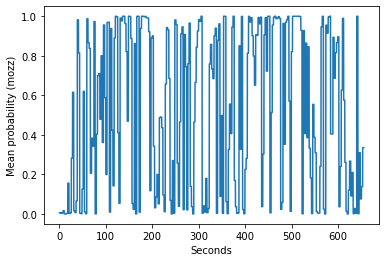

In [7]:
# Latest version from detector_testing_full

# raw = [r'D:\Postdoc\Data\Semi Field Data\UK bednet trial\PHONE A\2020-09-08_19.04.55.928__v0.wav']
# filtered = [r'D:\Postdoc\MozzDetectorTestingSQL\Code\notebooks\proc_data\VADout\2020-09-08_19.04.55.928__v0.wav']
# TzA = [r'D:\Postdoc\MozzDetectorTestingSQL\Code\notebooks\proc_data\VADout\TanzaniaBednetOctober\01-10-2020\B2\2020-10-01_18.44.21.802__v3.wav']
# TzAraw = [r'D:\Postdoc\Data\Semi Field Data\TanzaniaBednetOctober\01-10-2020\B2\2020-10-01_18.44.21.802__v3.wav']
# # Confirmed noise (Dav):
dav_noise = [r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise0.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise1.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise2.wav', 
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise3.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise4.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise5.wav', 
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise6.wav']




sr = 8000

# Tanzania
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/VADout/Semi Field Data/TanzaniaBednetOctober/02-10-2020/'
# subdirectories = ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4']

directory = 'D:/Postdoc/Data/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/VADout/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'
subdirectories = ['A1', 'B1']
dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'

# # # subdirectories = ['A1']
directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/Culex_for_ogg/'
dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/Culex_for_ogg/'

subdirectories = ['']


# # UK bednet
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/VADout/Semi Field Data/UK bednet trial/'
# subdirectories = ['PHONE A','PHONE B']
# dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/Classifierout/VADout/Semi Field Data/UK bednet trial/'


# Thai
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Data/Thai/'
# subdirectories = ['sounds']
# dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/Classifierout/Thai/'

# directory  = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/music/'
# subdirectories = ['']
# dir_out = directory
# directory = 'F:\Music\Guitar Playthroughs\Audacity'



# directory = 'D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/C1/2020-11-10/'
# subdirectories = ['0000', '0100', '0200', '0300', '0400', '0500']
# dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/C1/'

#CNN:
to_filter = False
norm = False
step_size= 40
BNN = True
n_samples = 100

if norm:
    mean= np.load('mean_norm.npy')
    std = np.load('std_norm.npy')
else:
    mean = 0
    std = 1

for subdir in subdirectories:
    listdirectory = os.listdir(directory + subdir) # gets the name of all files in your dir
    for filename in listdirectory: 
        if filename.endswith(".wav"): # check each of the files for whether or not they end in .wav:
            print(filename)
            x, x_l = get_wav_for_path([directory + subdir + '/' + filename], sr =8000)
#             print(np.shape(x))
#             X = util.get_feat(x, sr=8000, feat_type=feat_type, flatten = flatten, n_feat=n_feat)
            X_CNN = util.get_feat(x, sr=8000, feat_type=feat_type, n_feat=n_feat, flatten = False)
    
            X_CNN = util.reshape_feat(X_CNN, win_size=win_size, step_size=step_size)
#             X_CNN = (X_CNN - mean)/std
#             print(np.shape(X_CNN))
            
            if BNN:
                out = []
                for i in range(n_samples):
                    out.append(model.predict(X_CNN))
                
                G_X, U_X, _ = util.active_BALD(np.log(out), X_CNN, 2)
                preds_list = util.detect_timestamps_BNN(np.repeat(np.mean(out, axis=0), step_size, axis=0),
                                      np.repeat(G_X, step_size, axis=0),
                                      np.repeat(U_X, step_size, axis=0))   
            
            if to_filter:
                preds_filt = np.zeros([len(preds_CNN),2])
                preds_filt[:,1] = medfilt(preds_CNN[:,1], kernel_size=51)
                preds_filt[:,0] = 1 - preds_filt[:,1]
                preds_CNN = preds_filt
            
#             preds_list = util.detect_timestamps_BNN(np.repeat(preds_CNN, step_size, axis=0))
            print(preds_list)
            plt.plot((1/sr)*librosa.frames_to_samples(np.arange(len(np.repeat(np.mean(out, axis=0),step_size, axis=0))), hop_length=512),
                                               np.repeat(np.mean(out, axis=0), step_size, axis=0)[:,1])
            plt.xlabel('Seconds')
            plt.ylabel('Mean probability (mozz)')
            plt.show()

                    
            if not os.path.exists(dir_out + subdir): os.makedirs(dir_out + subdir)
            np.savetxt(dir_out + subdir + '/' + 'BNN_step_40_samples_100' + str(model_name) + filename + '.txt', preds_list, fmt='%s', delimiter='\t')
                               

# View predictions for certain features

In [75]:
X_Culex = np.load('proc_data/X_Culex_log-mel-step5.npy')
X_Culex_rest = np.load('proc_data/X_Culex_no_00_log-mel-step5.npy')

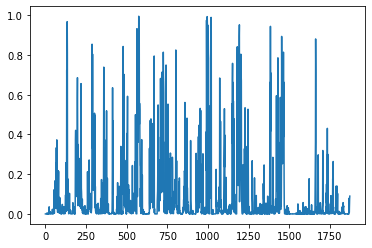

In [76]:
plt.plot(model.predict(X_Culex)[:,1])

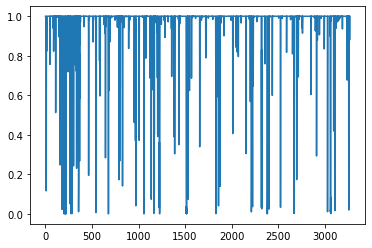

In [77]:
plt.plot(model.predict(X_Culex_rest)[:,1])